##### Copyright 2019, John J. H. OH

Licensed under the Apache License, Version 2.0 (the "License");

# 퍼셉트론으로 손으로 쓴 숫자 인식

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1Lv9rchnTm8diOwO8182ccoqdPWZGhww6#scrollTo=DUNzJc4jTj6G"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/thejohnoh/AI_as_a_Hobby/blob/master/5%EB%B6%84%EB%A7%8C%EC%97%90_%EC%B2%AB_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8_%EB%8F%8C%EB%A0%A4%EB%B3%B4%EA%B8%B0.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />깃허브(GitHub) 소스 보기</a>
  </td>
</table>

# 손글씨 숫자 읽기

첫 과제로 딥러닝, 혹은 신경망학습이라고 하는 방법을 써서 사람이 손으로 쓴 숫자를 읽어내는 인공지능 프로그램을 만들어 보겠습니다. 다음 이미지들과 같이 사람이 손으로 쓴 글자를 읽을 수 있는 프로그램을 만드는거죠. 우리가 사용할 MNIST라는 데이터는 사진처럼 사람이 손으로 쓴 숫자를 스캔한 이미지를 많이 모아놓은 것입니다.

<img src="https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png">

#코랩 사용하기

다음의 주소를 웹브라우저의 주소창에 입력하면 이 문서에 접근할 수 있습니다. 브라우저는 호환성을 위해 크롬을 권장합니다.

https://bit.ly/perceptron-digit-recognition (이 문서)

https://bit.ly/perceptron-core-code (숫자인식기 주 코드)

이 문서는 [구글 코랩](https://colab.research.google.com/notebooks/welcome.ipynb)(Colaboratory) 노트북 파일입니다. Francois Chollet의 책 [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438)과 구글의 [TensorFlow 튜토리얼](https://www.tensorflow.org/beta/tutorials/)을 참고로 만들었습니다. 

초보자도 구글의 코랩(colab)을 이용하면 쉽게 인공지능 코딩 환경을 사용할 수 있습니다.
인공지능 프로그램을 위한 도구로 파이썬 프로그래밍언어와 구글이 만든 텐서플로라는 인공지능 라이브러리를 사용할 것입니다. 
코랩은  브라우저에서 직접 실행할 수 있기 때문에 텐서플로를 배우고 사용하기 좋은 도구입니다:

이 예제를 공부하려면 구글 지메일 계정과 그에 포함된 구글드라이브를 사용해야합니다. 지메일이 없는 분은 <a target="_blank" href="https://support.google.com/mail/answer/56256?hl=ko" />지메일 만들기</a>를 참조해서 만듭니다. 

현재 파일은 여러분이 수정할 수 없는 공유화일이므로 일단 화일의 사본을 여러분의 구글 드라이브에 만들고 시작하겠습니다.

  코랩을 사용하면 여러분이 직접 파이썬이나 텐서플로같은 소프트웨어를 설치하거나 업데이트, 버전의 호환성 등의 걱정을 할 필요가 없고 인공지능 프로그램을 돌리는데 거의 필수적인 GPU나 TPU를 무료로 사용할 수 있습니다. 여러분이 인공지능 프로그램에 익숙해지고, 하이엔드 PC와 GPU를 가지고 있지 않으면 초보자를 면할 때까지 구글의 코랩을 사용하는 것을 권장합니다.

# 프로그램 실행하기

1. 파이썬 런타임(runtime)에 연결하세요: 메뉴 막대의 오른쪽 상단에서 **런타임** 메뉴를 선택하세요.
2. **런타임** > **모두 실행**을 선택합니다. 노트북의 모든 셀들이 실행됩니다.
3. 셀을 하나씩 수행하려면 셀 처음의 괄호르 클릭합니다.

#텐서플로 임포트하기
먼저 프로그램에 텐서플로 라이브러리를 임포트합니다. 텐서플로는 현재 가장 많이 쓰이는 인공지능 개발 도구입니다. 케라스는 이를 이용해 만든 라이브러리 모음들입니다. 머신러닝과 딥러닝의 주요 연구결과등이 모두 포함되 있습니다. 첫 명령은 코랩에만 해당되는 것으로 텐서플로 라이브러리 버전 2(최신)를 사용하라는 것입니다.

In [ ]:
# Colab only
%tensorflow_version 2.x

tensorflow와 tf.keras를 임포트합니다

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

# 데이터 준비하기

MNIST 데이터셋을 읽어옵니다. 

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

인공지능 프로그램을 학습시키키 위한 데이터들의 구조를 살펴보죠. 다음 코드는 데이터가 들어있는 어레이의 크기를 알아보는 것입니다. x_train은 이미지데이터입니다. 학습용 데이터에 60,000개의 이미지가 있군요. 각 이미지는 28x28 개의 픽셀로 된 이미지입니다. y_train은 뭘까요?

In [ ]:
x_train.shape, y_train.shape

![대체 텍스트](https://miro.medium.com/max/1446/1*cLsTCWtUL1GYBUv8vnbOxw.jpeg)

위의 이미지 데이터는 그림과 같은 형태입니다. 배경은 0이고 그레이스케일로 `에서 255까지의 값이 있는 부분이 글씨입니다. 첫번째 이미지를 확인해 보겠습니다.

In [ ]:
print(x_train[0])

이 데이터를 사진 이미지로 볼수 있을까요? 네 어렵지 않습니다. 파이썬의 matplotlib이라는 라이브러리를 쓰면 됩니다. import 명령어를 써서 라이브러리를 가져오고 plt 라는 이름을 줍니다. imshow 는 여러분 짐작처럼 "이미지를 보여줘" 이런 뜻입니다.

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

이제 숫자가 무엇인지 볼수 있게 되었습니다. 이제 y_train과 비교해 봅니다.


In [ ]:
print(y_train[0])

신경망을 훈련하기 전에 이 데이터를 각 픽셀이 0에서 1까지의 값을 갖도록 바꾸어 줍니다.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

#신경망 만들기

이제 이 훈련용 데이터를 이용해서 숫자를 읽을 수 있도록 신경망을 만들고 학습시켜보겠습니다. 어떤 신경망을 쓸 것인가 하는 것은 keras 라이브러리의 모델 중에 sequential 이라는 모델을 사용하겠습니다. 자세한 것은 앞으로 상세 강의에서 알려드리겠습니다만 대략의 모습은 이렇게 생겼습니다.

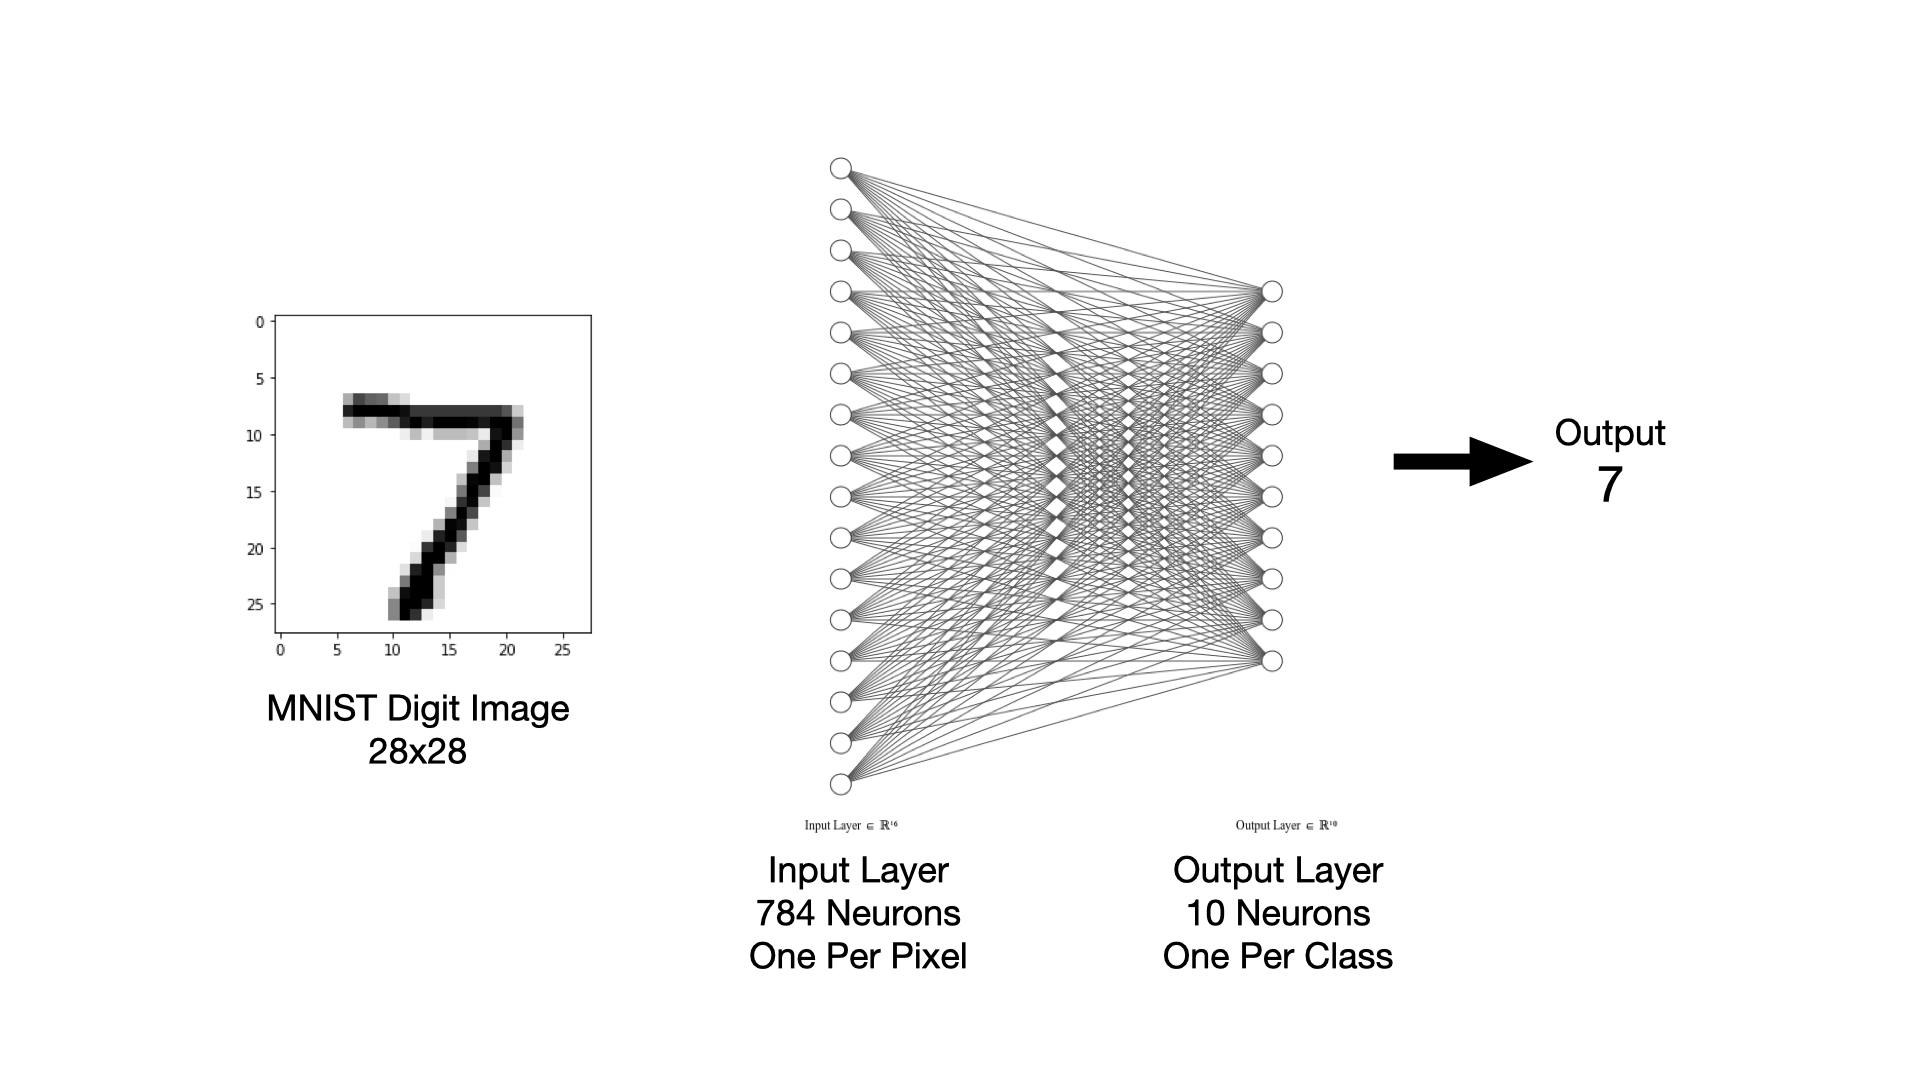

Keras의 model 함수(기능)을 이용해서 신경망을 만들어 줍니다.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#신경망 학습시키기
이제 신경망이 정의되었으니 학습시켜 봅시다.

In [ ]:
model.fit(x_train, y_train, epochs=10)

학습이 끝났습니다. 새로운 이미지를 읽을 수 있는지 테스트해 봅니다.

In [ ]:
predictions = model.predict(x_test)

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
print (predictions[0])

이중 값이 가장 큰 것이 신경망이 낸 답이죠

In [ ]:
import numpy as np
print(np.argmax(predictions[0]))

이것은 확률을 나타내는 값들입니다. 이 중 확률이 높다고 예측된 값을 출력해 본 것입니다. 전체 테스트 데이터에 대해 얼마나 잘 학습되었는지 측정해 봅니다.

In [ ]:
model.evaluate(x_test, y_test)

학습된 퍼셉트론 숫자인식기는 이 데이터셋에서 약 92%의 정확도를 보여줍니다. 우리가 만든 코드의 원리와 더 다양한 응용들은 다음 강의들에서 다루겠지만 성미가 급해서 다음 강의까지 기다릴 수 없는 분들은 Francois Chollet의 책 [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438)과 구글의 [TensorFlow 튜토리얼](https://www.tensorflow.org/beta/tutorials/)에 있는 여러가지 내용들을 공부해보세요.